## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import Data
import math
import warnings
warnings.filterwarnings('ignore')

importing Jupyter notebook from Data.ipynb


## Data Handling

In [3]:
df = pd.read_csv('Data Set for Assignment 1.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Sigmoid Function

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

## Stochastic Gradient Descent

In [5]:
def stochastic(train,learning,iterations):
    tclass = train['diagnosis'].tolist()
    train = train.drop(columns = ['id', 'diagnosis'])
    xbias = []
    for i in range(len(train)):
        xbias.append(1)

    train.insert(loc = 0, column = 'bias', value = xbias, allow_duplicates = False) #Adding a bias column at position 0 to our training data

    sample = []

    omega = list(np.ones(31)) #setting the initial value of omega vector to all zeroes

    for i in range(1):
        if(omega[i] == 1):
            omega[i] = 0
            
    for i in range(len(tclass)): #We assign B to 0 and M to 1
        if(tclass[i] == 'B'):
            sample.append(0)
        else:
            sample.append(1)
            
    error = []

    gradient = []

    i = 0
    for i in range(iterations):
        while i < len(train):
            x = list(train.iloc[i])
            error.append(-1 * sample[i] * np.log(sigmoid(np.dot(omega,x))) - ((1 - sample[i]) * np.log(1 - sigmoid(np.dot(omega,x)))))
            gradient = [ j * (sigmoid(np.dot(omega,x)) - sample[i]) for j in x]
            gradient = [k * learning for k in gradient]
            omega = list(np.subtract(omega,gradient))
            i = i + 1
                   
    return omega,error

## Batch Gradient Descent

In [6]:
def batch(train,learning,iterations):
    tclass = train['diagnosis'].tolist()
    train = train.drop(columns = ['id', 'diagnosis'])
    xbias = []
    for i in range(len(train)):
        xbias.append(1)

    train.insert(loc = 0, column = 'bias', value = xbias, allow_duplicates = False) #Adding a bias column at position 0 to our training data

    sample = []

    omega = list(np.ones(31)) #setting the initial value of omega vector to all zeroes

    for i in range(1):
        if(omega[i] == 1):
            omega[i] = 0
            
    for i in range(len(tclass)): #We assign B to 0 and M to 1
        if(tclass[i] == 'B'):
            sample.append(0)
        else:
            sample.append(1)
    
    error1 = []
    gradient1 = []
    k = 0
    for u in range(iterations):
        sum = 0
        gsum = list(np.zeros(31))
        for k in range(len(train)):
            y = list(train.iloc[k])
            g = (-1 * sample[k] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k]) * np.log(1 - sigmoid(np.dot(omega,y)))))
            if(math.isnan(g) == True):
                sum = sum
            else:
                sum = sum + g
            grad = [l * (sigmoid(np.dot(omega,y)) - sample[k]) for l in y]
            gsum = list(np.add(gsum,grad))
            k = k + 1
        error1.append(sum)
        gradient1 = [m * learning for m in gsum]
        omega = list(np.subtract(omega,gradient1))


    return omega,error1

## Mini Batch Gradient Descent

In [7]:
def mini_batch(train,learning,iterations):

    tclass = train['diagnosis'].tolist()
    train = train.drop(columns = ['id', 'diagnosis'])
    xbias = []
    for i in range(len(train)):
        xbias.append(1)

    train.insert(loc = 0, column = 'bias', value = xbias, allow_duplicates = False) #Adding a bias column at position 0 to our training data

    sample = []

    omega = list(np.ones(31)) #setting the initial value of omega vector to all zeroes

    for i in range(1):
        if(omega[i] == 1):
            omega[i] = 0
            
    for i in range(len(tclass)): #We assign B to 0 and M to 1
        if(tclass[i] == 'B'):
            sample.append(0)
        else:
            sample.append(1)

    error1 = []

    gradient1  = []


    k = 0
    for p in range(iterations):
        j = 0
        while j < 6:
            sum = 0
            gsum = list(np.zeros(31))
            if(j == 0):
                for k in range(63):
                    y = list(train.iloc[k])
                    g = (-1 * sample[k] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1
            if(j == 1):
                for k in range(63):
                    y = list(train.iloc[k+64])
                    g = (-1 * sample[k+64] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k+64]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k+64]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1

            if(j == 2):
                for k in range(63):
                    y = list(train.iloc[k+128])
                    g = (-1 * sample[k+128] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k+128]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k+128]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1

            if(j == 3):
                for k in range(63):
                    y = list(train.iloc[k+192])
                    g = (-1 * sample[k+192] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k+192]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k+192]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1
            
            if(j == 4):
                for k in range(63):
                    y = list(train.iloc[k+256])
                    g = (-1 * sample[k+256] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k+256]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k+256]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1

            if(j == 5):
                for k in range(len(train) - 320):
                    y = list(train.iloc[k+320])
                    g = (-1 * sample[k+320] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k+320]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k+320]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1

            error1.append(sum)
            gradient1 = [m * learning for m in gsum]
            omega = list(np.subtract(omega,gradient1))
            j = j + 1

    return omega,error1
        



## Testing The Model

In [8]:
def logistic_accuracy(omega,test,threshold):

    ybias = []
    for i in range(len(test)):
        ybias.append(1)

    test.insert(loc = 0, column = 'bias', value = ybias, allow_duplicates = False)

    teclass = test['diagnosis'].tolist()
    test = test.drop(columns = ['id', 'diagnosis'])
    prediction = []
    for i in range(len(test)):
        big = np.float128(np.dot(omega,test.iloc[i]))
        """
        if(big > 1000):
            prediction.append('B')
        elif(big < -1000):
            prediction.append('M')
        """
        if(sigmoid(big) > threshold):
            prediction.append('M')
        else:
            prediction.append('B')

    accuracy = 0
    for i in range(len(teclass)):
        if(prediction[i] == teclass[i]):
            accuracy = accuracy + 1

    correct = accuracy / len(teclass)
    
    return correct

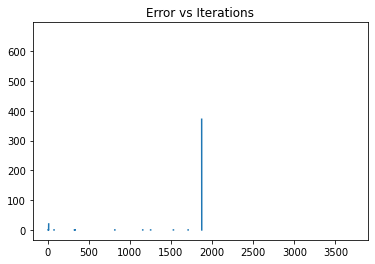

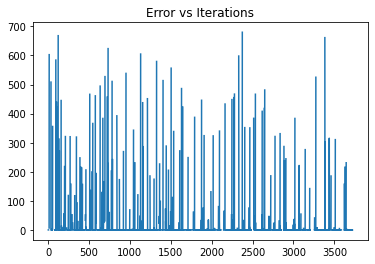

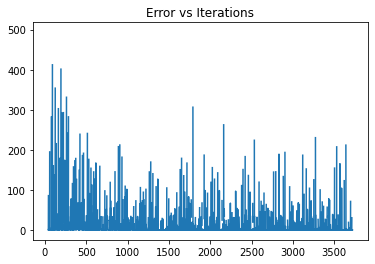

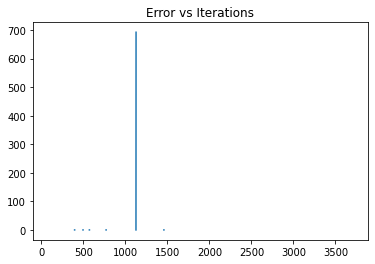

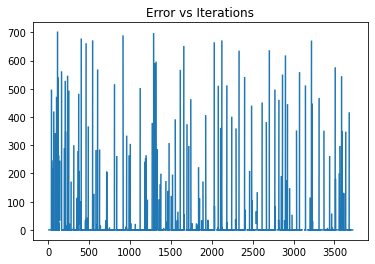

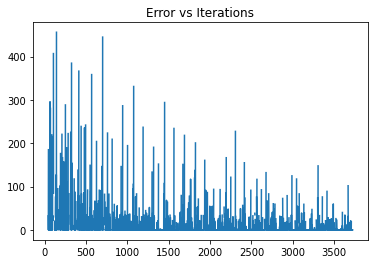

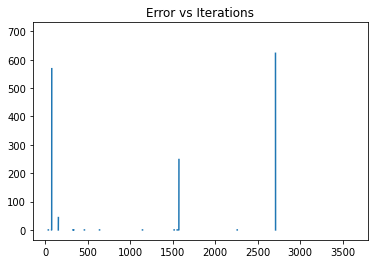

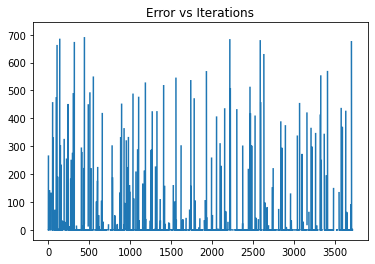

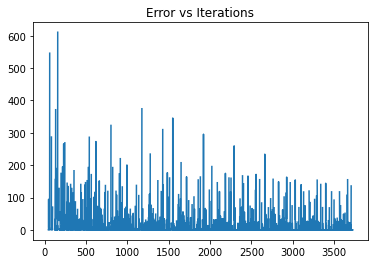

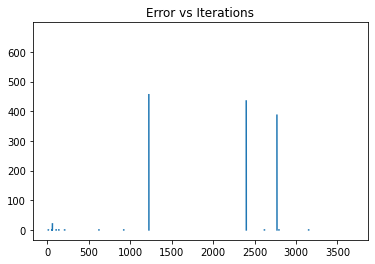

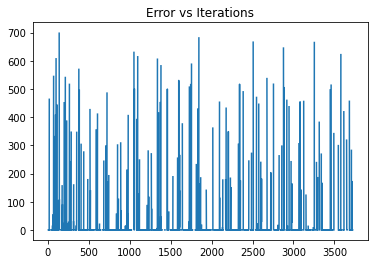

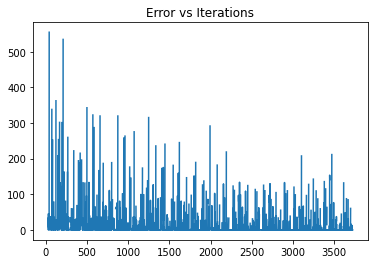

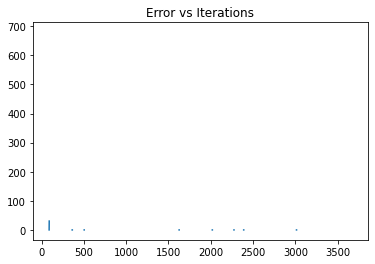

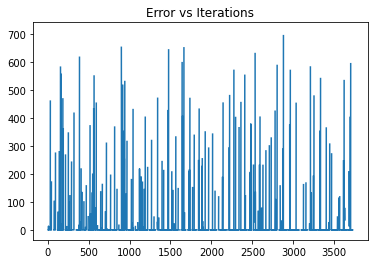

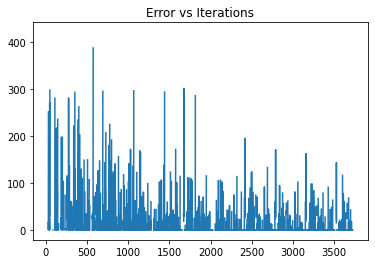

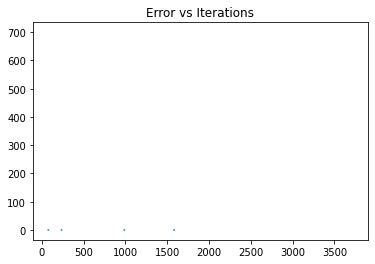

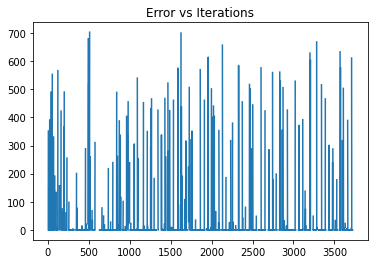

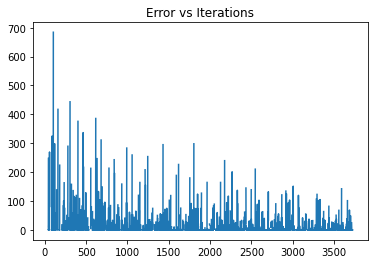

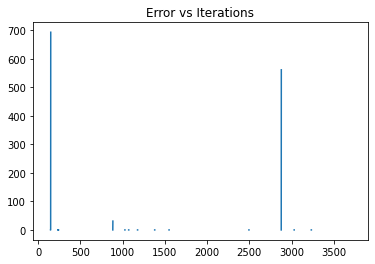

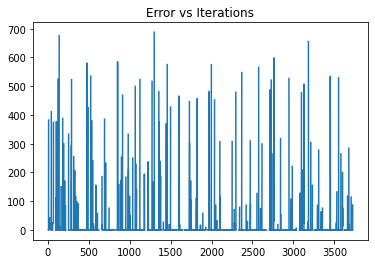

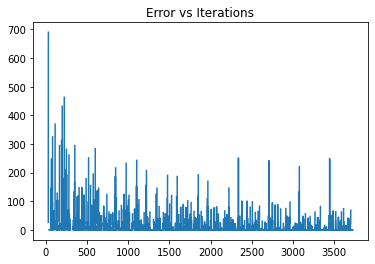

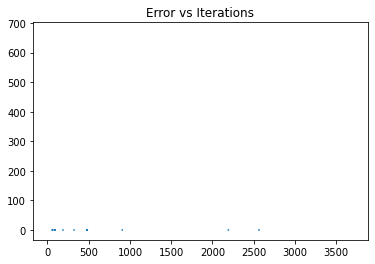

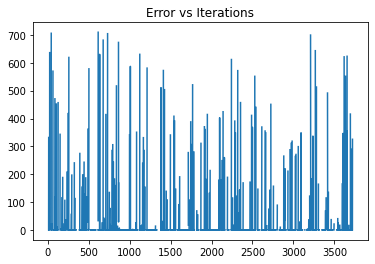

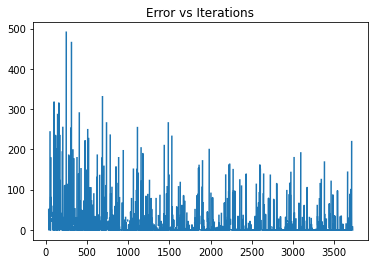

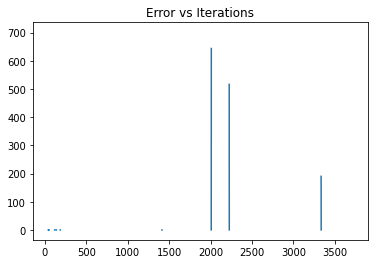

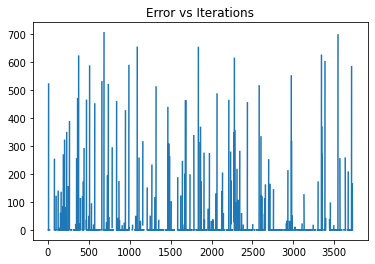

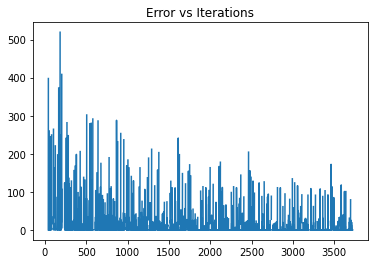

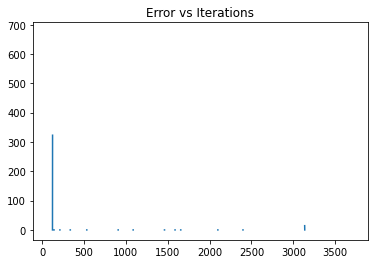

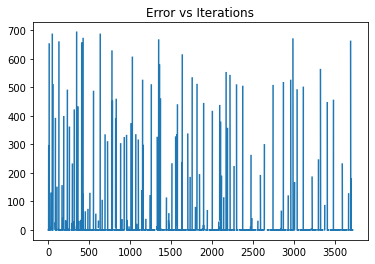

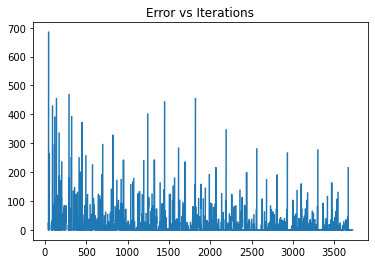

,Accuracy of SGD for LR1,Iteration 1,Iteration 2,Iteration 3,Iteration 4,Iteration 5,Iteration 6,Iteration 7,Iteration 8,Iteration 9,Iteration 10,Mean,Variance
0,0.0100,0.854839,0.494624,0.897849,0.569892,0.919355,0.591398,0.844086,0.897849,0.924731,0.924731,0.791935,0.025853
1,0.0010,0.935484,0.811828,0.790323,0.779570,0.919355,0.924731,0.725806,0.924731,0.473118,0.768817,0.805376,0.017741
2,0.0001,0.731183,0.892473,0.887097,0.849462,0.876344,0.924731,0.854839,0.892473,0.913978,0.935484,0.875806,0.003015


In [33]:
lr = [0.01, 0.001, 0.0001]
means = []
var = []

LR1_stochastic = pd.DataFrame(lr, columns=["Accuracy of SGD for LR1"])
for i in range(10):
    #train = Data.Feature2(train)
    #test = Data.Feature2(test)
    acc = []
    for j in lr:
        initial_data = Data.data_fix(df)
        d1 = Data.dshuffle(initial_data)
        train, test = Data.split(d1)
        omega,error = stochastic(train,j,10)
        corr = logistic_accuracy(omega,test,0.5)
        acc.append(corr)
        plt.plot(error)
        plt.title("Error vs Iterations")
        plt.savefig(f"results/LR1_stochastic_{j}.jpg")
        plt.show()

    LR1_stochastic.insert(loc = i+1, column = f"Iteration {i+1}", value = acc)


LR1_stochastic = LR1_stochastic.drop(columns = ['Accuracy of SGD for LR1'])

means.append(np.mean(LR1_stochastic.iloc[0]))
means.append(np.mean(LR1_stochastic.iloc[1]))
means.append(np.mean(LR1_stochastic.iloc[2]))

var.append(np.var(LR1_stochastic.iloc[0]))
var.append(np.var(LR1_stochastic.iloc[1]))
var.append(np.var(LR1_stochastic.iloc[2]))

LR1_stochastic.insert(loc = 10, column = "Mean", value = means)
LR1_stochastic.insert(loc = 11, column = "Variance", value = var)


LR1_stochastic.insert(loc = 0, column = 'Accuracy of SGD for LR1', value = lr)

LR1_stochastic.to_excel("results/LR1_stochastic.xlsx")

LR1_stochastic

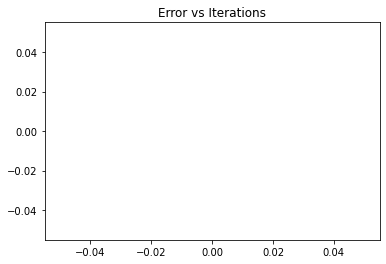

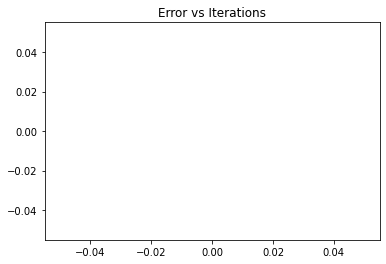

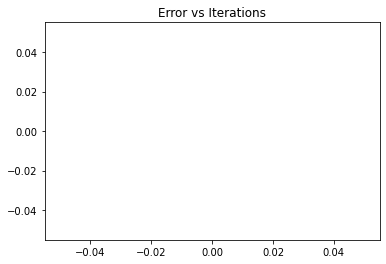

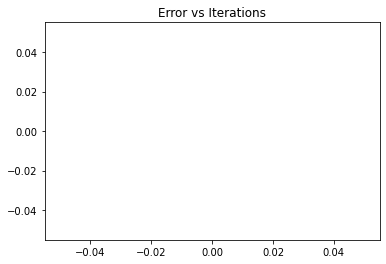

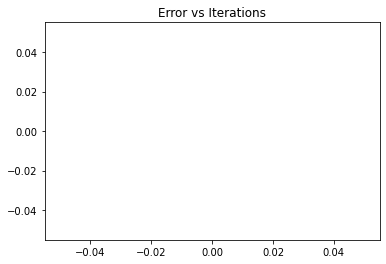

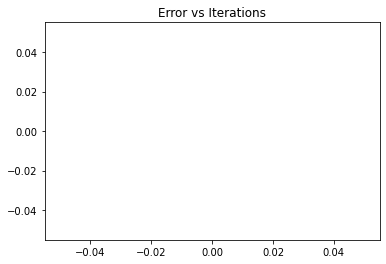

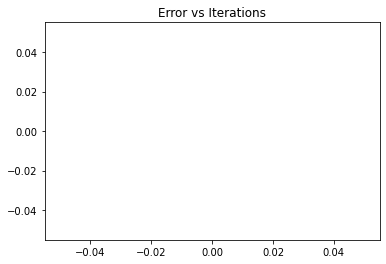

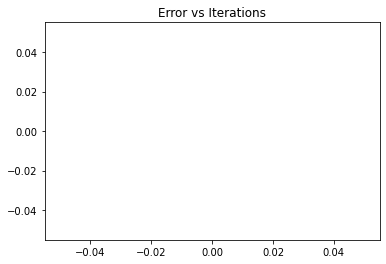

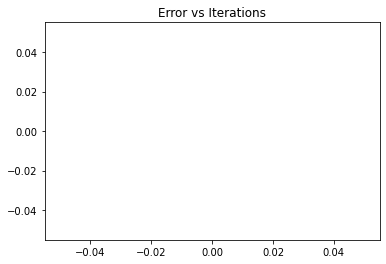

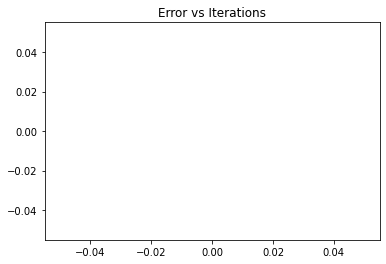

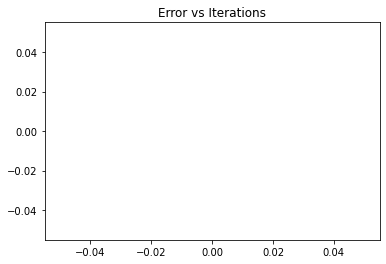

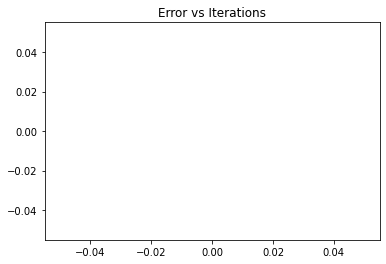

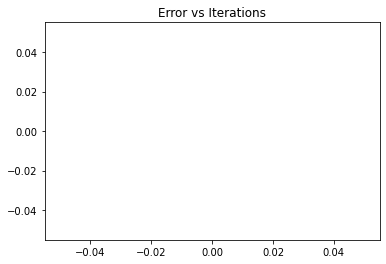

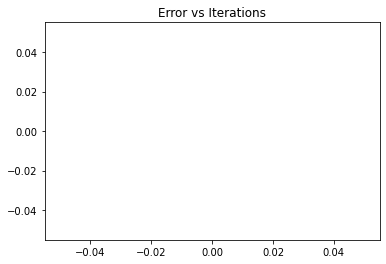

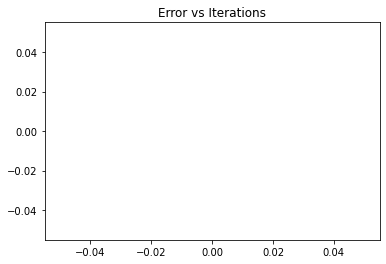

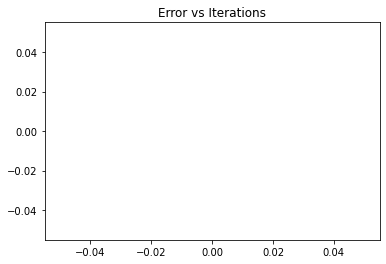

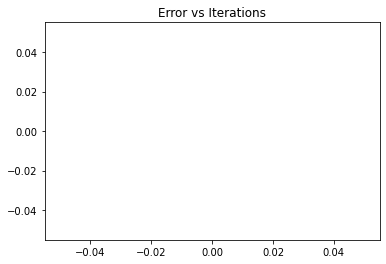

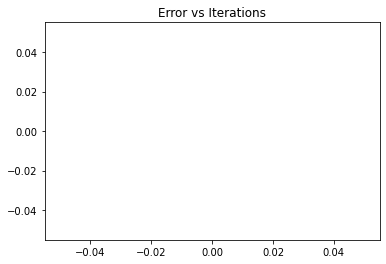

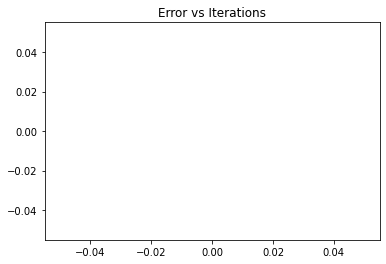

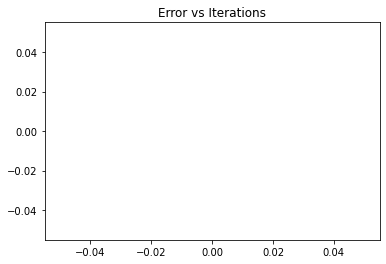

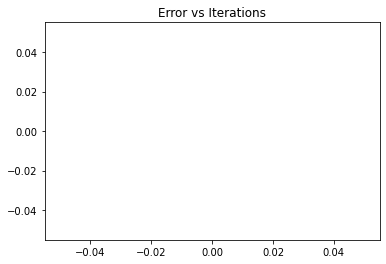

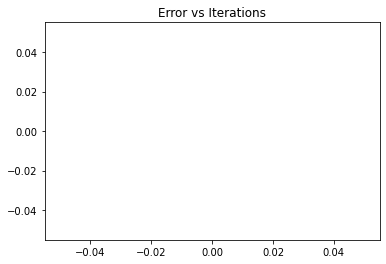

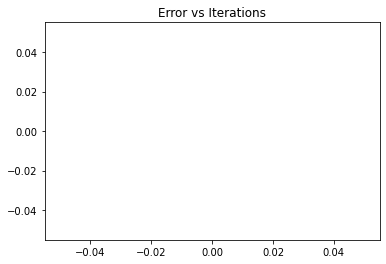

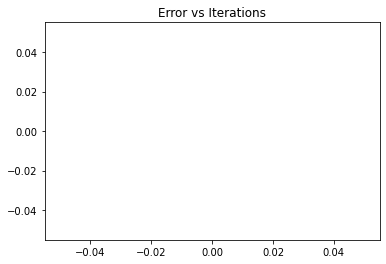

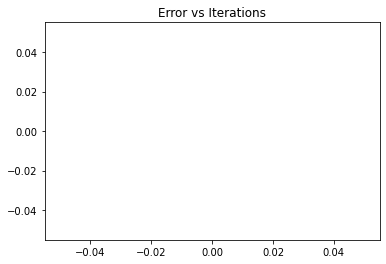

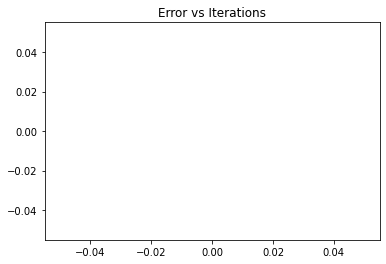

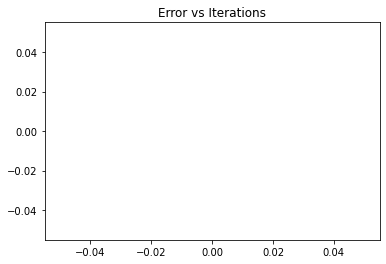

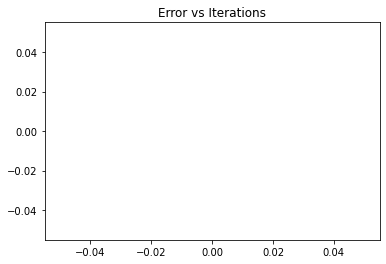

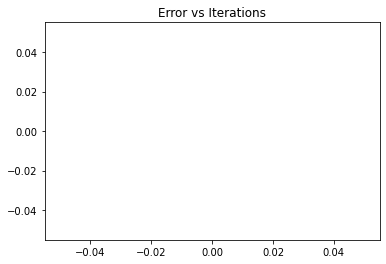

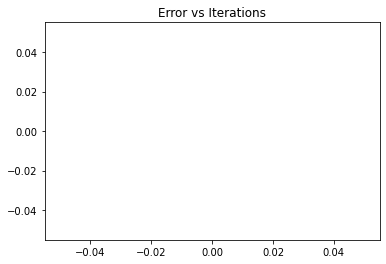

,Accuracy of BGD for LR1,Iteration 1,Iteration 2,Iteration 3,Iteration 4,Iteration 5,Iteration 6,Iteration 7,Iteration 8,Iteration 9,Iteration 10,Mean,Variance
0,0.0100,0.903226,0.870968,0.897849,0.935484,0.897849,0.790323,0.924731,0.946237,0.919355,0.913978,0.900000,0.001747
1,0.0010,0.903226,0.908602,0.908602,0.860215,0.892473,0.897849,0.838710,0.946237,0.924731,0.897849,0.897849,0.000827
2,0.0001,0.908602,0.806452,0.919355,0.892473,0.887097,0.844086,0.365591,0.913978,0.903226,0.897849,0.833871,0.025462


In [34]:
lr = [0.01, 0.001, 0.0001]
means = []
var = []

LR1_batch = pd.DataFrame(lr, columns=["Accuracy of BGD for LR1"])
for i in range(10):
    #train = Data.Feature2(train)
    #test = Data.Feature2(test)
    acc = []
    for j in lr:
        initial_data = Data.data_fix(df)
        d1 = Data.dshuffle(initial_data)
        train, test = Data.split(d1)
        omega,error = batch(train,j,1000)
        corr = logistic_accuracy(omega,test,0.5)
        acc.append(corr)
        plt.plot(error)
        plt.title("Error vs Iterations")
        plt.savefig(f"results/LR1_batch_{j}.jpg")
        plt.show()

    LR1_batch.insert(loc = i+1, column = f"Iteration {i+1}", value = acc)


LR1_batch = LR1_batch.drop(columns = ['Accuracy of BGD for LR1'])

means.append(np.mean(LR1_batch.iloc[0]))
means.append(np.mean(LR1_batch.iloc[1]))
means.append(np.mean(LR1_batch.iloc[2]))

var.append(np.var(LR1_batch.iloc[0]))
var.append(np.var(LR1_batch.iloc[1]))
var.append(np.var(LR1_batch.iloc[2]))

LR1_batch.insert(loc = 10, column = "Mean", value = means)
LR1_batch.insert(loc = 11, column = "Variance", value = var)

LR1_batch.insert(loc = 0, column = 'Accuracy of BGD for LR1', value = lr)

LR1_batch.to_excel("results/LR1_batch.xlsx")

LR1_batch

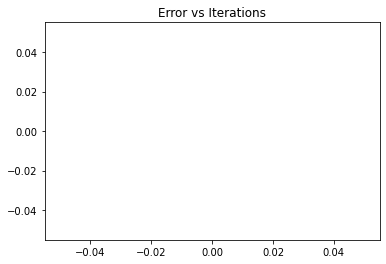

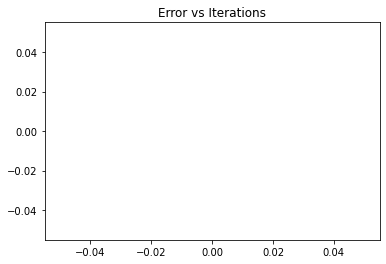

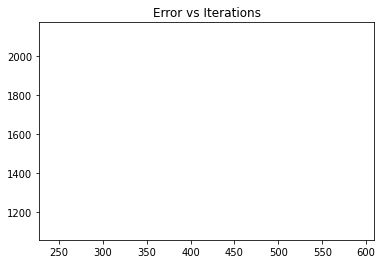

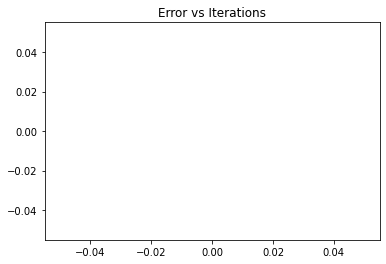

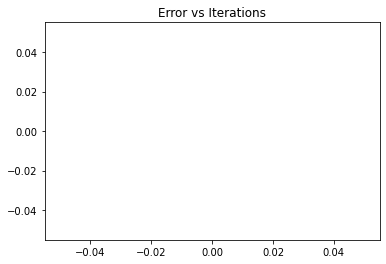

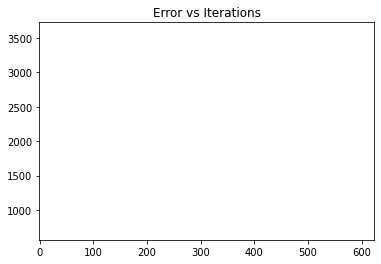

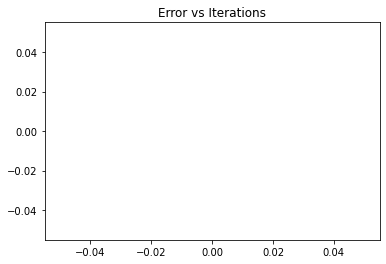

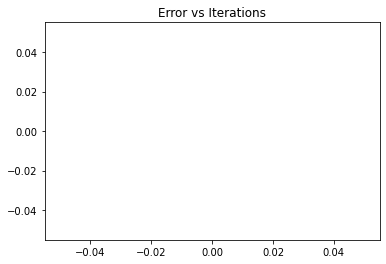

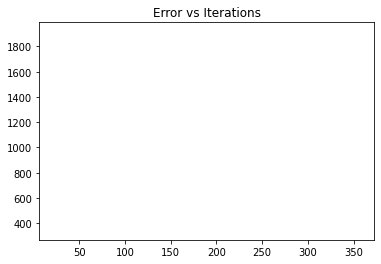

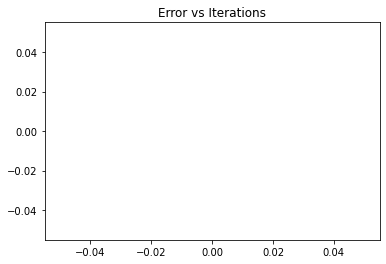

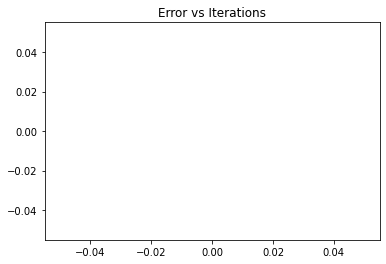

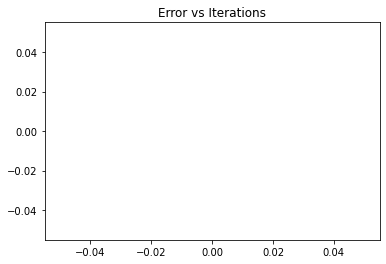

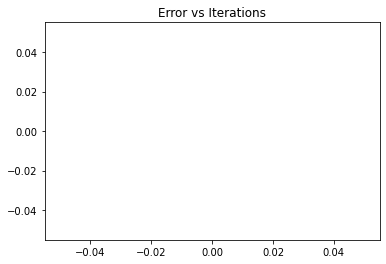

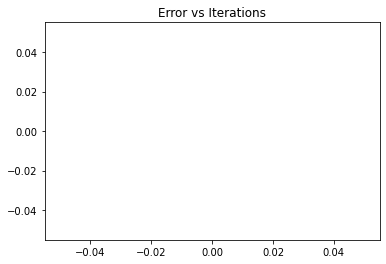

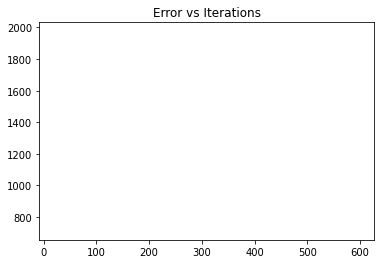

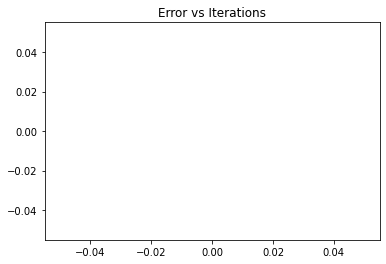

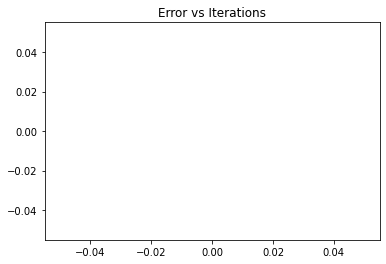

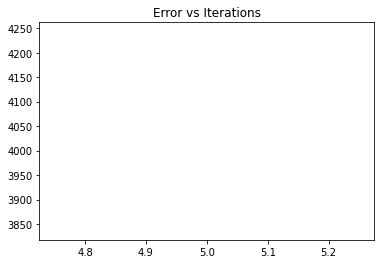

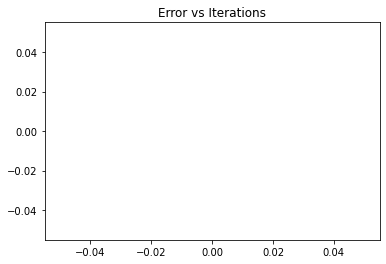

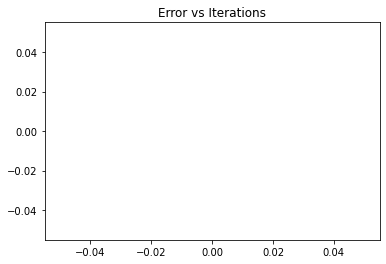

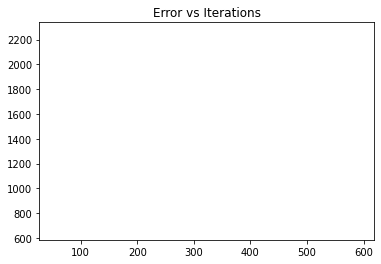

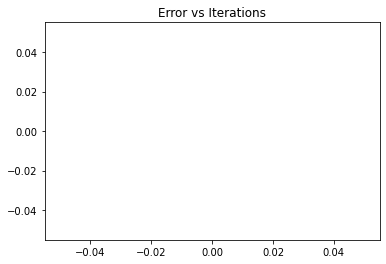

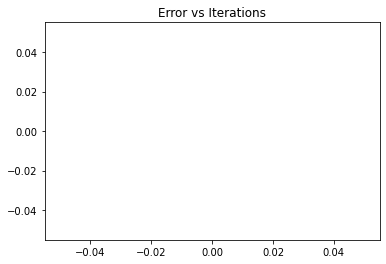

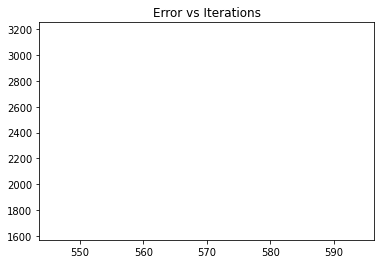

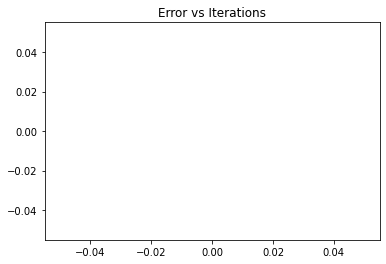

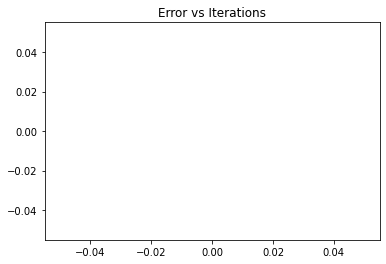

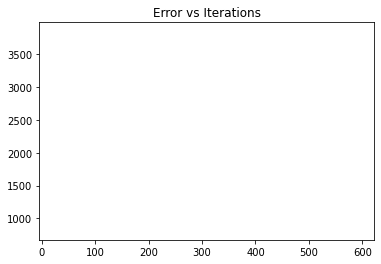

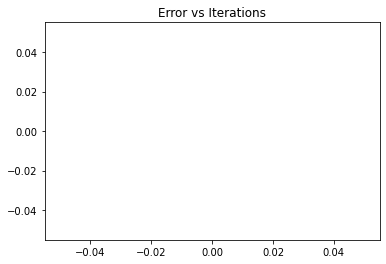

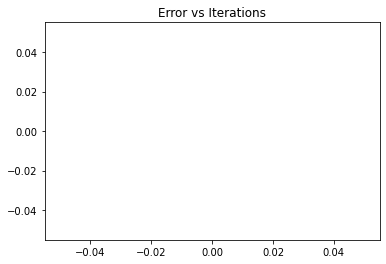

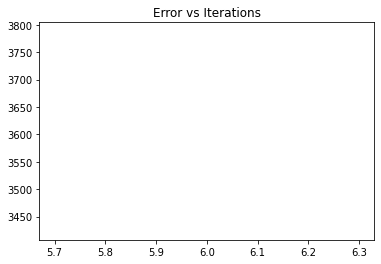

,Accuracy of MBGD for LR1,Iteration 1,Iteration 2,Iteration 3,Iteration 4,Iteration 5,Iteration 6,Iteration 7,Iteration 8,Iteration 9,Iteration 10,Mean,Variance
0,0.0100,0.844086,0.451613,0.908602,0.790323,0.924731,0.892473,0.919355,0.940860,0.860215,0.827957,0.836022,0.018483
1,0.0010,0.919355,0.763441,0.768817,0.860215,0.806452,0.887097,0.784946,0.811828,0.887097,0.887097,0.837634,0.002918
2,0.0001,0.849462,0.908602,0.913978,0.838710,0.924731,0.844086,0.924731,0.913978,0.930108,0.790323,0.883871,0.002146


In [38]:
lr = [0.01, 0.001, 0.0001]
means = []
var = []

LR1_mini_batch = pd.DataFrame(lr, columns=["Accuracy of MBGD for LR1"])
for i in range(10):
    #train = Data.Feature2(train)
    #test = Data.Feature2(test)
    acc = []
    for j in lr:
        initial_data = Data.data_fix(df)
        d1 = Data.dshuffle(initial_data)
        train, test = Data.split(d1)
        omega,error = mini_batch(train,j,100)
        corr = logistic_accuracy(omega,test,0.5)
        acc.append(corr)
        plt.plot(error)
        plt.title("Error vs Iterations")
        plt.savefig(f"results/LR1_mini_batch_{j}.jpg")
        plt.show()

    LR1_mini_batch.insert(loc = i+1, column = f"Iteration {i+1}", value = acc)


LR1_mini_batch = LR1_mini_batch.drop(columns = ['Accuracy of MBGD for LR1'])

means.append(np.mean(LR1_mini_batch.iloc[0]))
means.append(np.mean(LR1_mini_batch.iloc[1]))
means.append(np.mean(LR1_mini_batch.iloc[2]))

var.append(np.var(LR1_mini_batch.iloc[0]))
var.append(np.var(LR1_mini_batch.iloc[1]))
var.append(np.var(LR1_mini_batch.iloc[2]))

LR1_mini_batch.insert(loc = 10, column = "Mean", value = means)
LR1_mini_batch.insert(loc = 11, column = "Variance", value = var)

LR1_mini_batch.insert(loc = 0, column = 'Accuracy of MBGD for LR1', value = lr)

LR1_mini_batch.to_excel("results/LR1_mini_batch.xlsx")

LR1_mini_batch

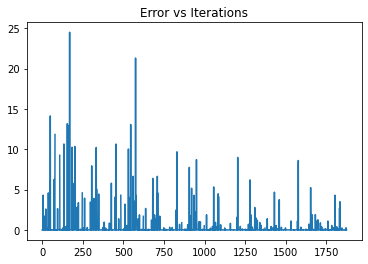

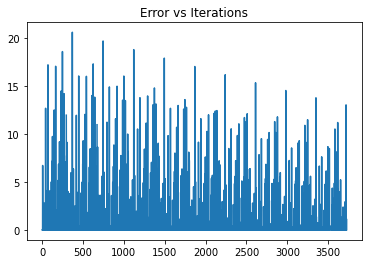

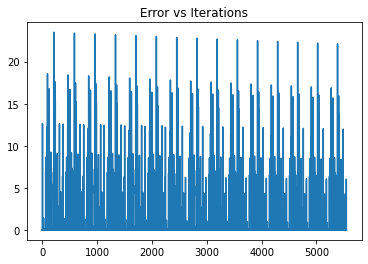

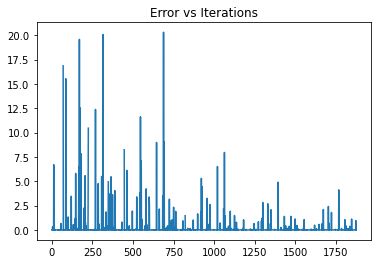

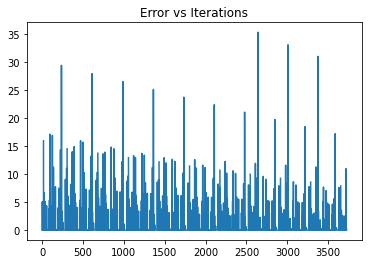

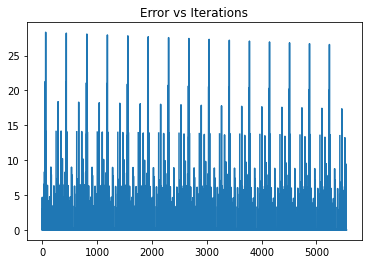

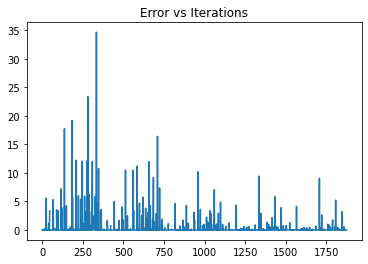

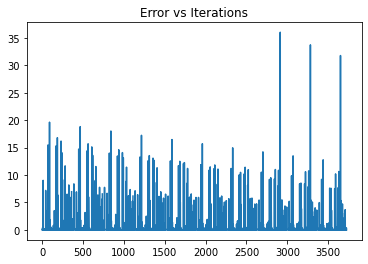

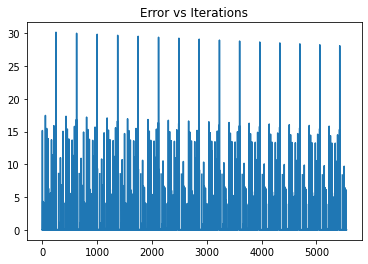

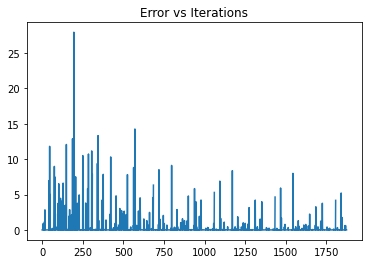

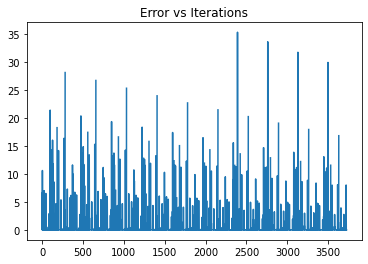

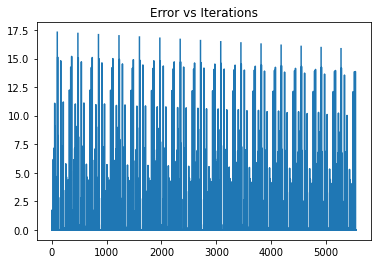

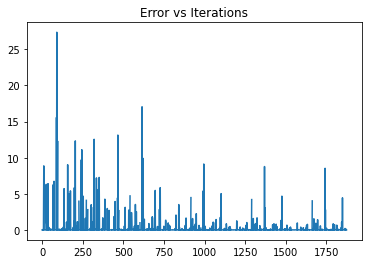

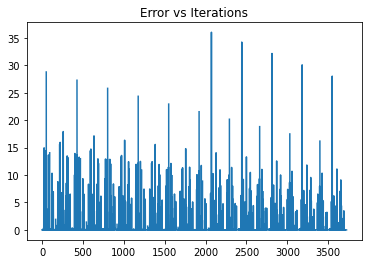

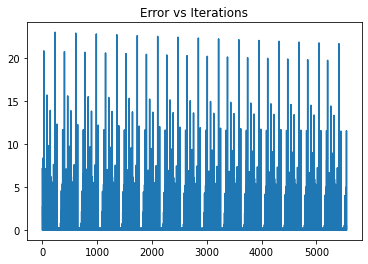

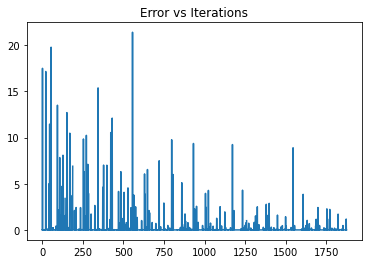

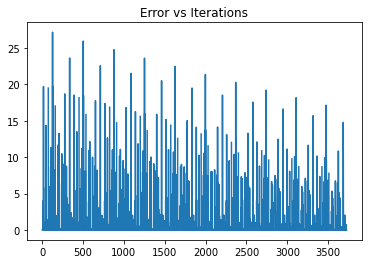

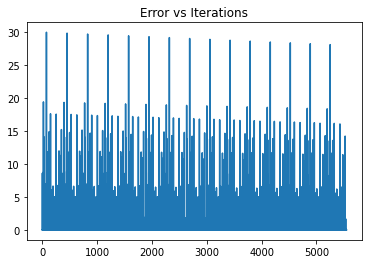

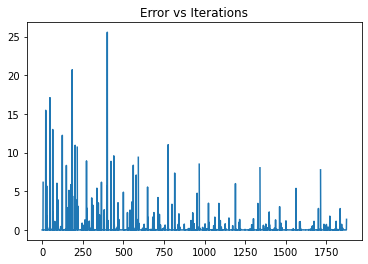

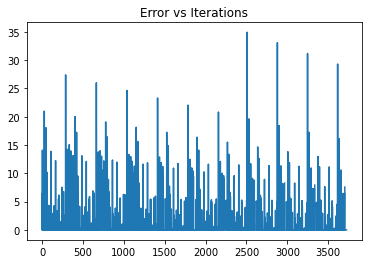

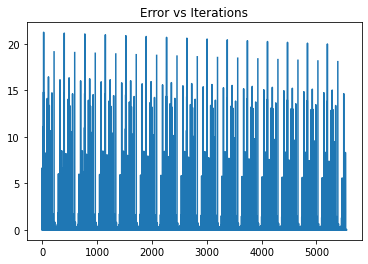

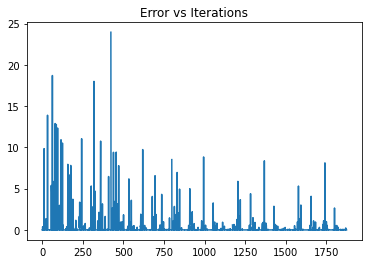

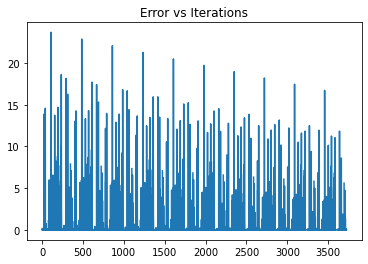

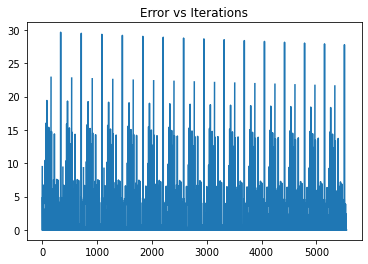

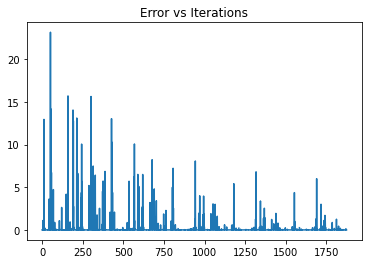

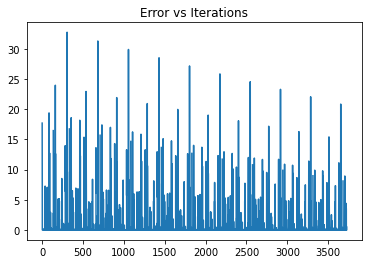

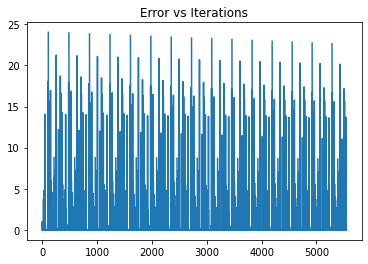

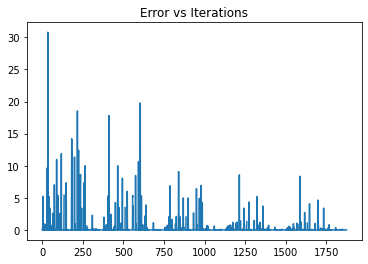

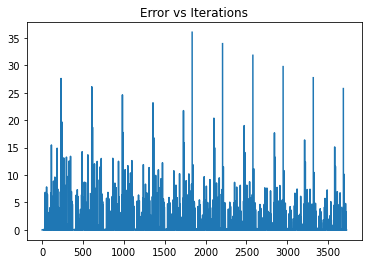

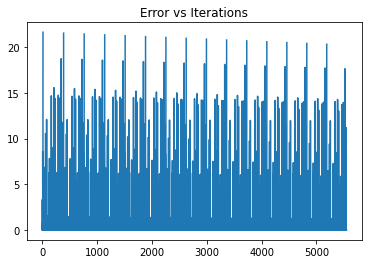

,Accuracy of SGD for LR2,Iteration 1,Iteration 2,Iteration 3,Iteration 4,Iteration 5,Iteration 6,Iteration 7,Iteration 8,Iteration 9,Iteration 10,Mean,Variance
0,0.0100,0.978495,0.940860,0.962366,0.967742,0.973118,0.973118,0.967742,0.967742,0.967742,0.967742,0.966667,0.000091
1,0.0010,0.930108,0.919355,0.913978,0.908602,0.930108,0.919355,0.919355,0.913978,0.908602,0.951613,0.921505,0.000151
2,0.0001,0.908602,0.897849,0.903226,0.870968,0.897849,0.876344,0.892473,0.919355,0.887097,0.903226,0.895699,0.000192


In [21]:
lr = [0.01, 0.001, 0.0001]
it = [5,10,15]
means = []
var = []

LR2_stochastic = pd.DataFrame(lr, columns=["Accuracy of SGD for LR2"])
for i in range(10):
    #train = Data.Feature2(train)
    #test = Data.Feature2(test)
    acc = []
    for j in range(len(lr)):
        initial_data = Data.Feature1(df)
        d1 = Data.dshuffle(initial_data)
        train, test = Data.split(d1)
        train = Data.Feature2(train)
        test = Data.Feature2(test)
        omega,error = stochastic(train,lr[j],it[j])
        corr = logistic_accuracy(omega,test,0.5)
        acc.append(corr)
        plt.plot(error)
        plt.title("Error vs Iterations")
        plt.savefig(f"results/LR2_stochastic_{lr[j]}.jpg")
        plt.show()

    LR2_stochastic.insert(loc = i+1, column = f"Iteration {i+1}", value = acc)


LR2_stochastic = LR2_stochastic.drop(columns = ['Accuracy of SGD for LR2'])

means.append(np.mean(LR2_stochastic.iloc[0]))
means.append(np.mean(LR2_stochastic.iloc[1]))
means.append(np.mean(LR2_stochastic.iloc[2]))

var.append(np.var(LR2_stochastic.iloc[0]))
var.append(np.var(LR2_stochastic.iloc[1]))
var.append(np.var(LR2_stochastic.iloc[2]))

LR2_stochastic.insert(loc = 10, column = "Mean", value = means)
LR2_stochastic.insert(loc = 11, column = "Variance", value = var)


LR2_stochastic.insert(loc = 0, column = 'Accuracy of SGD for LR2', value = lr)


LR2_stochastic.to_excel("results/LR2_stochastic.xlsx")

LR2_stochastic

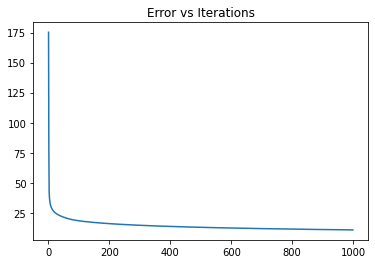

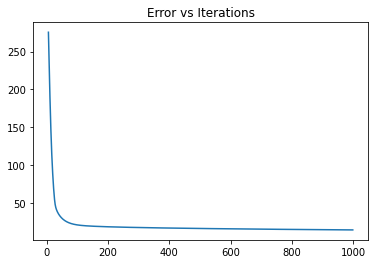

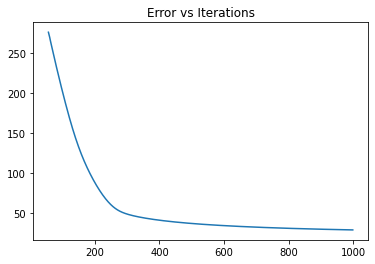

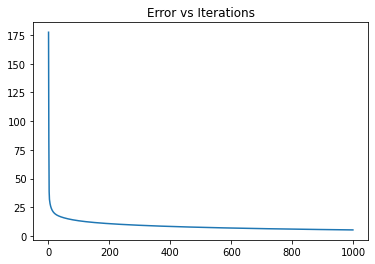

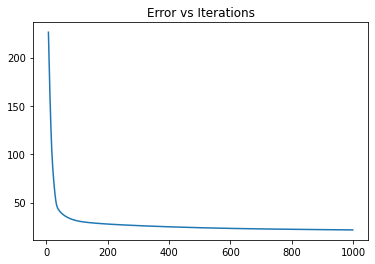

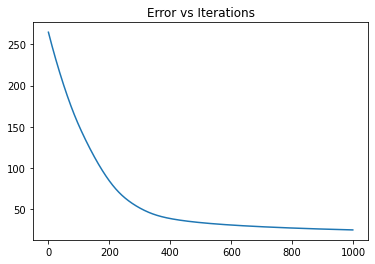

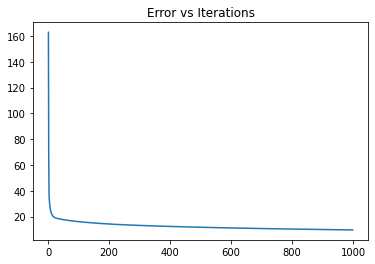

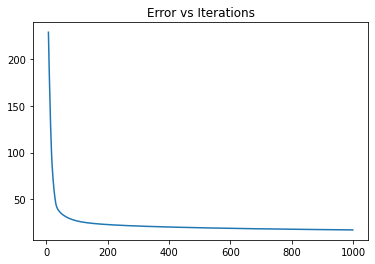

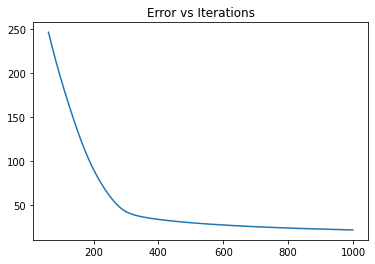

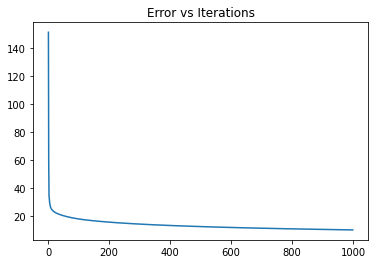

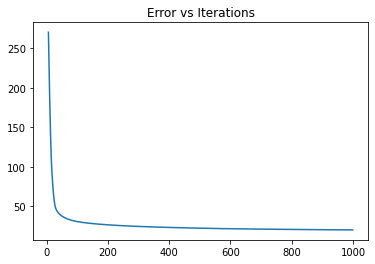

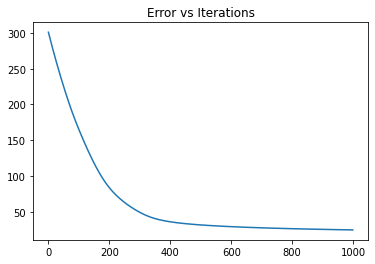

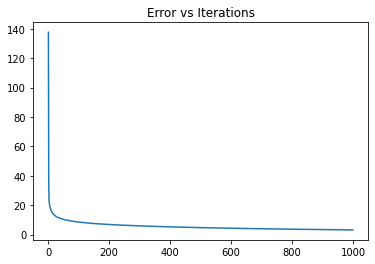

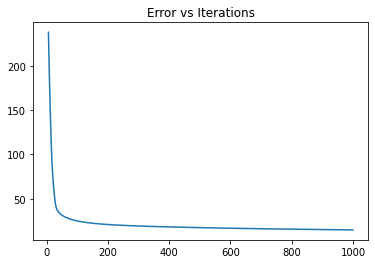

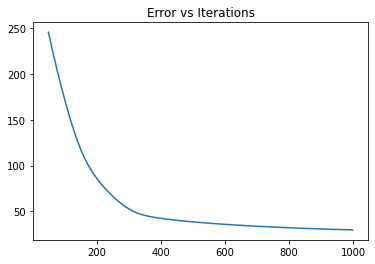

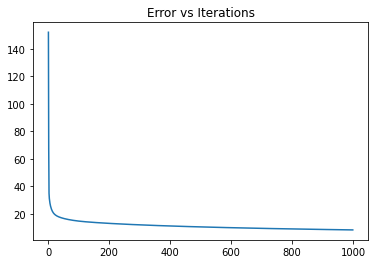

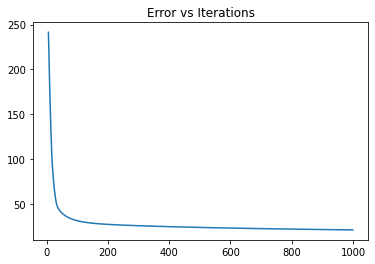

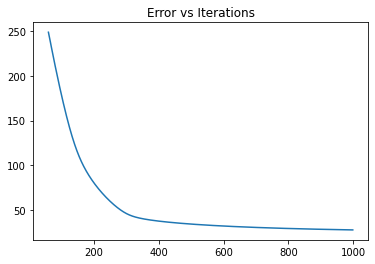

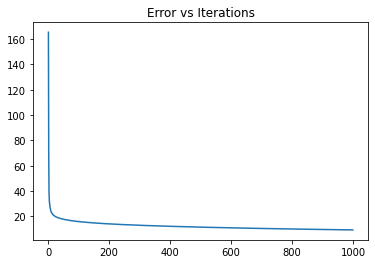

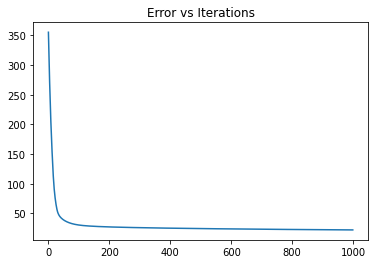

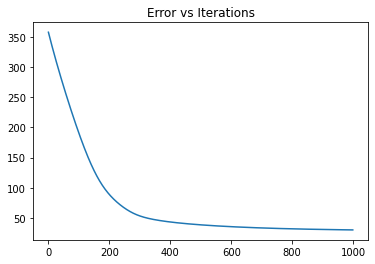

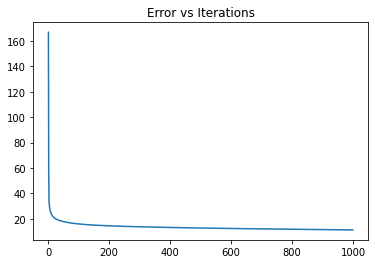

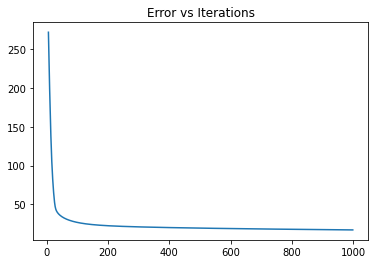

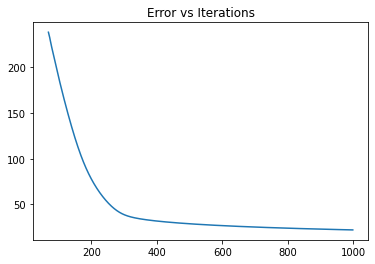

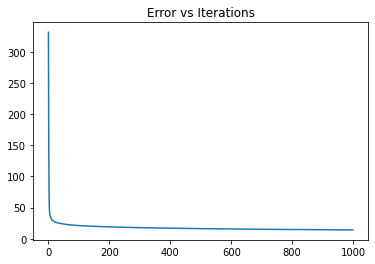

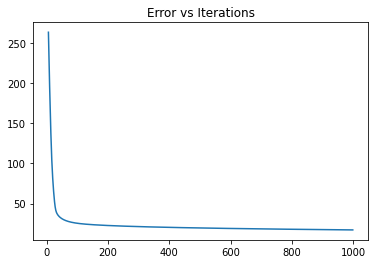

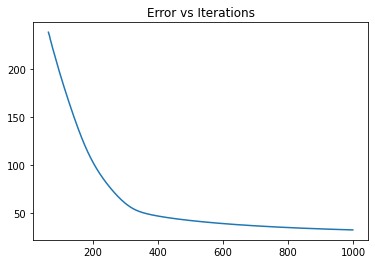

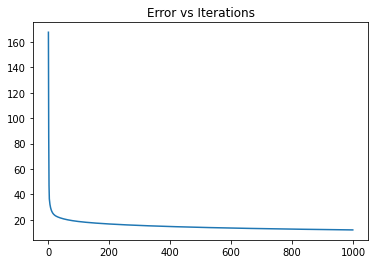

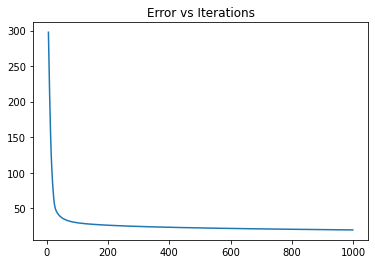

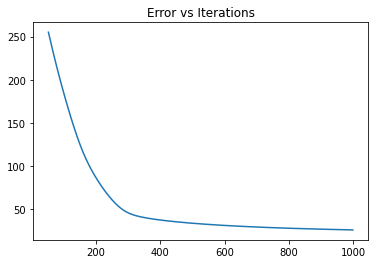

,Accuracy of BGD for LR2,Iteration 1,Iteration 2,Iteration 3,Iteration 4,Iteration 5,Iteration 6,Iteration 7,Iteration 8,Iteration 9,Iteration 10,Mean,Variance
0,0.0100,0.962766,0.957447,0.968085,0.957447,0.952128,0.968085,0.978723,0.941489,0.968085,0.978723,0.963298,0.000121
1,0.0010,0.946809,0.957447,0.984043,0.973404,0.941489,0.898936,0.989362,0.946809,0.957447,0.973404,0.956915,0.000614
2,0.0001,0.941489,0.968085,0.962766,0.957447,0.941489,0.968085,0.973404,0.936170,0.994681,0.994681,0.963830,0.000384


In [10]:
lr = [0.01, 0.001, 0.0001]
means = []
var = []

LR2_batch = pd.DataFrame(lr, columns=["Accuracy of BGD for LR2"])
for i in range(10):
    #train = Data.Feature2(train)
    #test = Data.Feature2(test)
    acc = []
    for j in lr:
        initial_data = Data.Feature1(df)
        d1 = Data.dshuffle(initial_data)
        train, test = Data.split(d1)
        train = Data.Feature2(train)
        test = Data.Feature2(test)
        omega,error = batch(train,j,1000)
        corr = logistic_accuracy(omega,test,0.5)
        acc.append(corr)
        plt.plot(error)
        plt.title("Error vs Iterations")
        plt.savefig(f"results/LR2_batch_{j}.jpg")
        plt.show()

    LR2_batch.insert(loc = i+1, column = f"Iteration {i+1}", value = acc)


LR2_batch = LR2_batch.drop(columns = ['Accuracy of BGD for LR2'])

means.append(np.mean(LR2_batch.iloc[0]))
means.append(np.mean(LR2_batch.iloc[1]))
means.append(np.mean(LR2_batch.iloc[2]))

var.append(np.var(LR2_batch.iloc[0]))
var.append(np.var(LR2_batch.iloc[1]))
var.append(np.var(LR2_batch.iloc[2]))

LR2_batch.insert(loc = 10, column = "Mean", value = means)
LR2_batch.insert(loc = 11, column = "Variance", value = var)

LR2_batch.insert(loc = 0, column = 'Accuracy of BGD for LR2', value = lr)

LR2_batch.to_excel("results/LR2_batch.xlsx")

LR2_batch

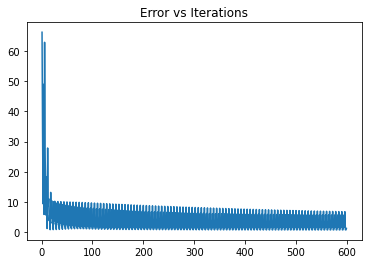

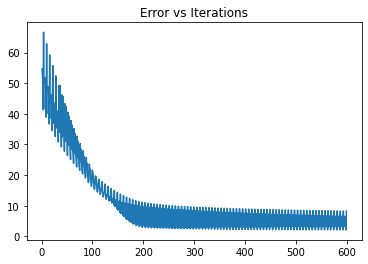

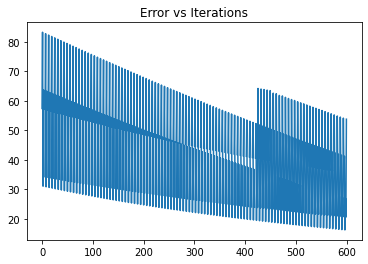

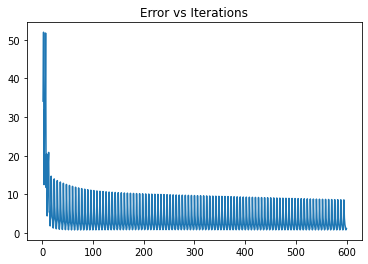

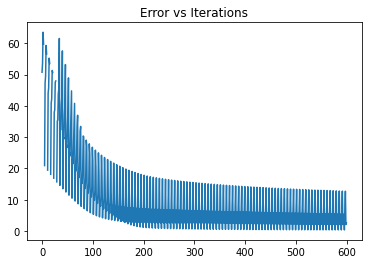

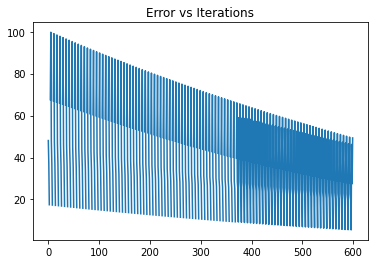

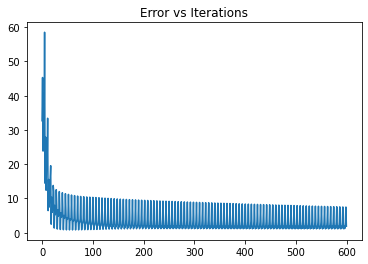

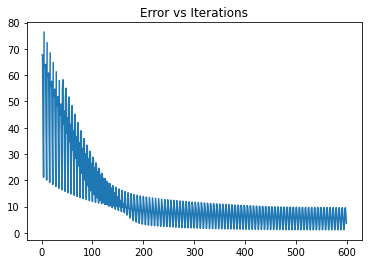

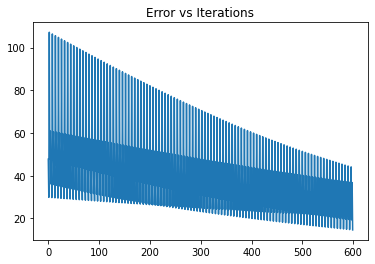

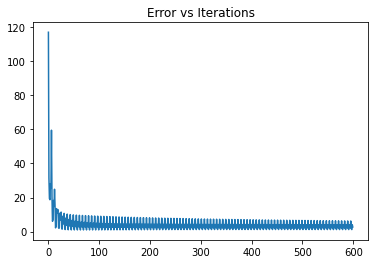

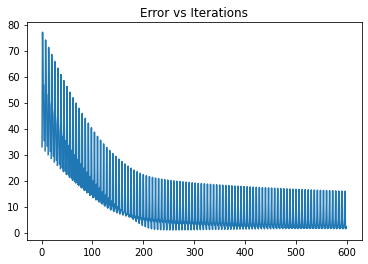

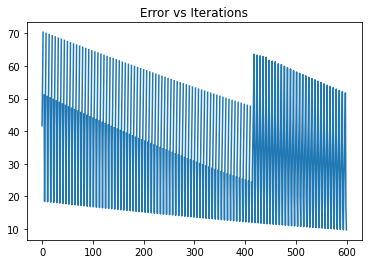

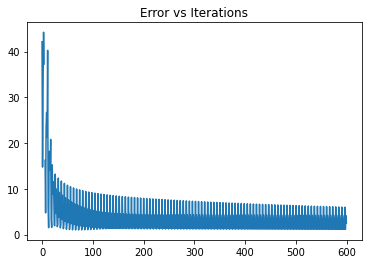

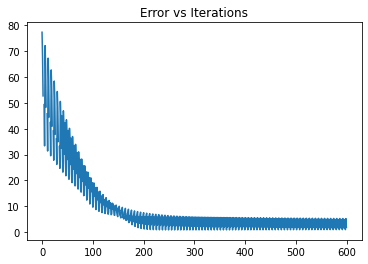

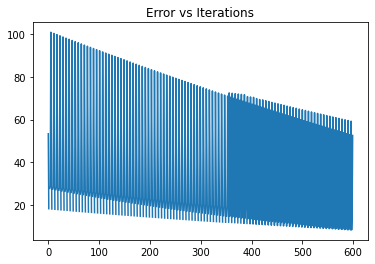

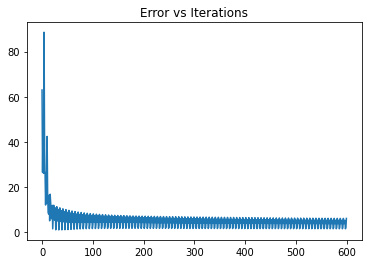

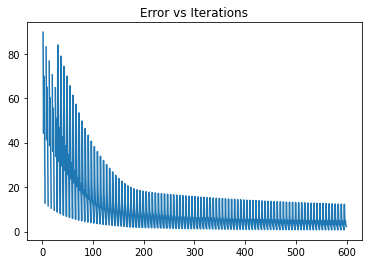

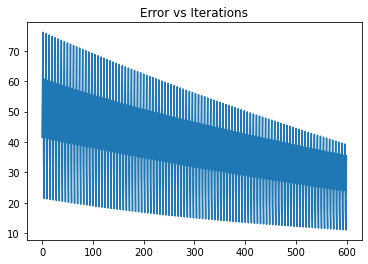

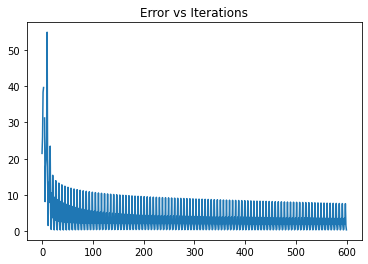

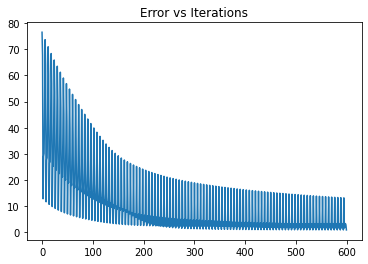

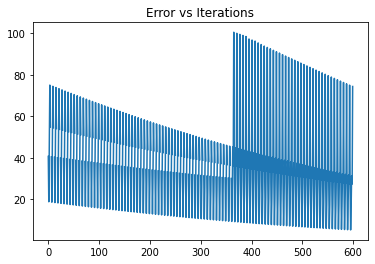

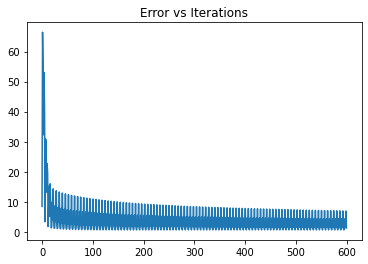

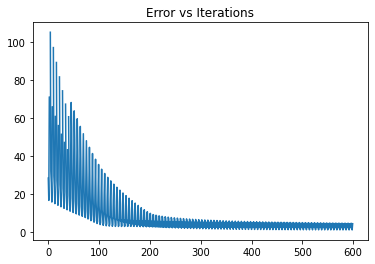

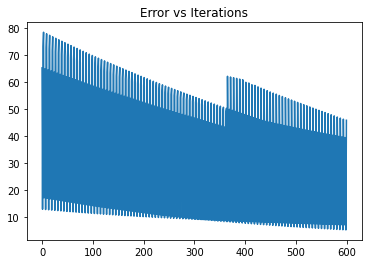

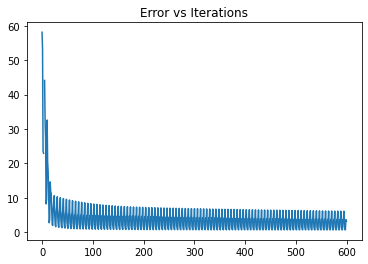

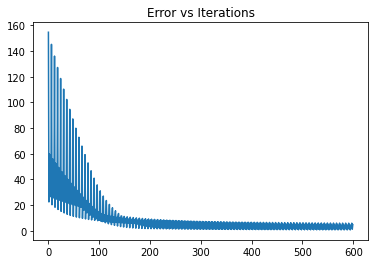

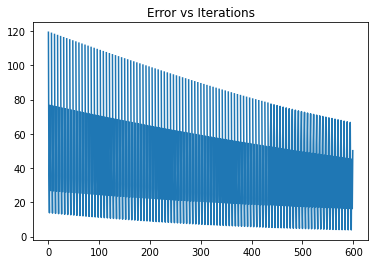

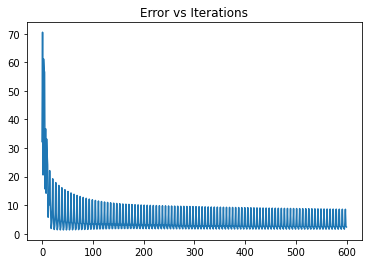

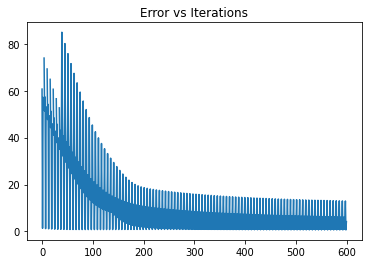

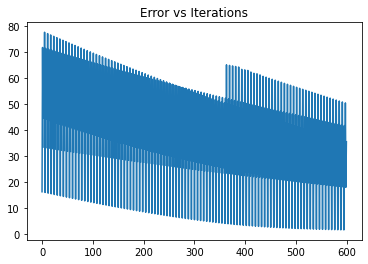

,Accuracy of MBGD for LR2,Iteration 1,Iteration 2,Iteration 3,Iteration 4,Iteration 5,Iteration 6,Iteration 7,Iteration 8,Iteration 9,Iteration 10,Mean,Variance
0,0.0100,0.968085,0.973404,0.957447,0.962766,0.962766,0.984043,0.962766,0.968085,0.962766,0.946809,0.964894,0.000086
1,0.0010,0.962766,0.973404,1.000000,0.952128,0.968085,0.957447,0.952128,0.952128,0.984043,0.984043,0.968617,0.000246
2,0.0001,0.936170,0.909574,0.914894,0.914894,0.898936,0.898936,0.936170,0.909574,0.925532,0.904255,0.914894,0.000170


In [9]:
lr = [0.01, 0.001, 0.0001]
means = []
var = []

LR2_mini_batch = pd.DataFrame(lr, columns=["Accuracy of MBGD for LR2"])
for i in range(10):
    #train = Data.Feature2(train)
    #test = Data.Feature2(test)
    acc = []
    for j in lr:
        initial_data = Data.Feature1(df)
        d1 = Data.dshuffle(initial_data)
        train, test = Data.split(d1)
        train = Data.Feature2(train)
        test = Data.Feature2(test)
        omega,error = mini_batch(train,j,100)
        corr = logistic_accuracy(omega,test,0.5)
        acc.append(corr)
        plt.plot(error)
        plt.title("Error vs Iterations")
        plt.savefig(f"results/LR2_mini_batch_{j}.jpg")
        plt.show()

    LR2_mini_batch.insert(loc = i+1, column = f"Iteration {i+1}", value = acc)


LR2_mini_batch = LR2_mini_batch.drop(columns = ['Accuracy of MBGD for LR2'])

means.append(np.mean(LR2_mini_batch.iloc[0]))
means.append(np.mean(LR2_mini_batch.iloc[1]))
means.append(np.mean(LR2_mini_batch.iloc[2]))

var.append(np.var(LR2_mini_batch.iloc[0]))
var.append(np.var(LR2_mini_batch.iloc[1]))
var.append(np.var(LR2_mini_batch.iloc[2]))

LR2_mini_batch.insert(loc = 10, column = "Mean", value = means)
LR2_mini_batch.insert(loc = 11, column = "Variance", value = var)

LR2_mini_batch.insert(loc = 0, column = 'Accuracy of MBGD for LR2', value = lr)

LR2_mini_batch.to_excel("results/LR2_mini_batch.xlsx")

LR2_mini_batch

In [64]:
acc = []
initial_data = Data.Feature1(df)
d1 = Data.dshuffle(initial_data)
train, test = Data.split(d1)
train = Data.Feature2(train)
test = Data.Feature2(test)
omega,error = stochastic(train,0.01,10)
corr = logistic_accuracy(omega,test,0.3)
acc.append(corr)
acc

[0.9680851063829787]

In [68]:
acc = []
initial_data = Data.Feature1(df)
d1 = Data.dshuffle(initial_data)
train, test = Data.split(d1)
train = Data.Feature2(train)
test = Data.Feature2(test)
omega,error = stochastic(train,0.01,10)
corr = logistic_accuracy(omega,test,0.7)
acc.append(corr)
acc

[0.9787234042553191]

In [72]:
acc = []
initial_data = Data.Feature1(df)
d1 = Data.dshuffle(initial_data)
train, test = Data.split(d1)
train = Data.Feature2(train)
test = Data.Feature2(test)
omega,error = stochastic(train,0.01,10)
corr = logistic_accuracy(omega,test,0.5)
acc.append(corr)
acc

[0.9680851063829787]